In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import combine_prediction_files

# Load the YP21 station and network magnitudes for the test and holdout sets

In [5]:
ypml_amps = pd.read_csv(f'../data/old_catalogs/yellowstone.amps.ypml-v5.2023.csv')
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
p_test = pd.read_csv(os.path.join(datadir, 'p.test.csv'))
p_2022 = pd.read_csv(os.path.join(datadir, 'p.2022.csv'))
s_test = pd.read_csv(os.path.join(datadir, 's.test.csv'))
s_2022 = pd.read_csv(os.path.join(datadir, 's.2022.csv'))

In [6]:
p_test_evids = p_test['Evid'].unique()
print(p_test_evids.shape)
p_test_ypml = ypml_amps[ypml_amps['Evid'].isin(p_test_evids)][['Evid', 'Sta', 'Event-Mean-YPML-S', 'Station-YPML-S']]
print(p_test_ypml.Evid.unique().shape)
p_test_resids = p_test_ypml['Event-Mean-YPML-S'] - p_test_ypml['Station-YPML-S']

(1283,)
(1283,)


In [7]:
p_2022_evids = p_2022['Evid'].unique()
print(p_2022_evids.shape)
p_2022_ypml = ypml_amps[ypml_amps['Evid'].isin(p_2022_evids)][['Evid', 'Sta', 'Event-Mean-YPML-S', 'Station-YPML-S']]
print(p_2022_ypml.Evid.unique().shape)
p_2022_resids = p_2022_ypml['Event-Mean-YPML-S'] - p_2022_ypml['Station-YPML-S']


(197,)
(197,)


In [8]:
s_test_evids = s_test['Evid'].unique()
print(s_test_evids.shape)
s_test_ypml = ypml_amps[ypml_amps['Evid'].isin(s_test_evids)][['Evid', 'Sta', 'Event-Mean-YPML-S', 'Station-YPML-S']]
print(s_test_ypml.Evid.unique().shape)
s_test_resids = s_test_ypml['Event-Mean-YPML-S'] - s_test_ypml['Station-YPML-S']

(1106,)
(1106,)


In [9]:
s_2022_evids = s_2022['Evid'].unique()
print(s_2022_evids.shape)
s_2022_ypml = ypml_amps[ypml_amps['Evid'].isin(s_2022_evids)][['Evid', 'Sta', 'Event-Mean-YPML-S', 'Station-YPML-S']]
print(s_2022_ypml.Evid.unique().shape)
s_2022_resids = s_2022_ypml['Event-Mean-YPML-S'] - s_2022_ypml['Station-YPML-S']


(178,)
(178,)


In [10]:
p_test_resids.describe()[['50%', 'std']]

50%    0.003620
std    0.163536
dtype: float64

In [11]:
s_test_resids.describe()[['50%', 'std']]

50%    0.003734
std    0.161857
dtype: float64

In [12]:
p_2022_resids.describe()[['50%', 'std']]

50%    0.005043
std    0.159352
dtype: float64

In [13]:
s_2022_resids.describe()[['50%', 'std']]

50%    0.004061
std    0.152847
dtype: float64

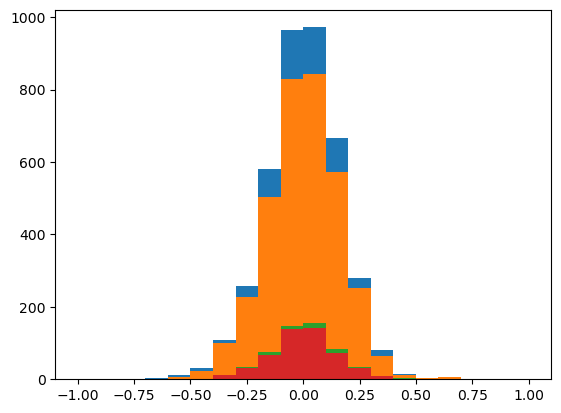

In [14]:
plt.hist(p_test_resids, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_test_resids, bins=np.arange(-1, 1.01, 0.1));
plt.hist(p_2022_resids, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_2022_resids, bins=np.arange(-1, 1.01, 0.1));

In [15]:
s_test_resids.shape

(3444,)

# Load the new, predicted $M_L$ values

In [16]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_results_df = pd.read_csv(os.path.join(datadir, 'p_models', 'selected_features', 'all.stat.results.csv'))
s_results_df = pd.read_csv(os.path.join(datadir, 's_models', 'selected_features', 'all.stat.results.csv'))


In [17]:
s_stats = s_results_df['station']
pred_path = os.path.join(datadir,'s_models', 'selected_features')
s_test_preds_df = combine_prediction_files(s_stats, pred_path,'S', 'test')
s_holdout_preds_df = combine_prediction_files(s_2022['station'].unique(), pred_path,'S', 'holdout')

In [18]:
s_test_preds_df.shape

(2638, 4)

In [19]:
p_stats = p_results_df['station']
pred_path = os.path.join(datadir,'p_models', 'selected_features')
p_test_preds_df = combine_prediction_files(p_stats, pred_path,'P', 'test')
p_holdout_preds_df = combine_prediction_files(p_2022['station'].unique(), pred_path,'P', 'holdout')

In [20]:
p_pred_test_resids = p_test_preds_df['magnitude'] - p_test_preds_df['predicted_magnitude']
p_pred_holdout_resids = p_holdout_preds_df['magnitude'] - p_holdout_preds_df['predicted_magnitude']

In [21]:
s_pred_test_resids = s_test_preds_df['magnitude'] - s_test_preds_df['predicted_magnitude']
s_pred_holdout_resids = s_holdout_preds_df['magnitude'] - s_holdout_preds_df['predicted_magnitude']

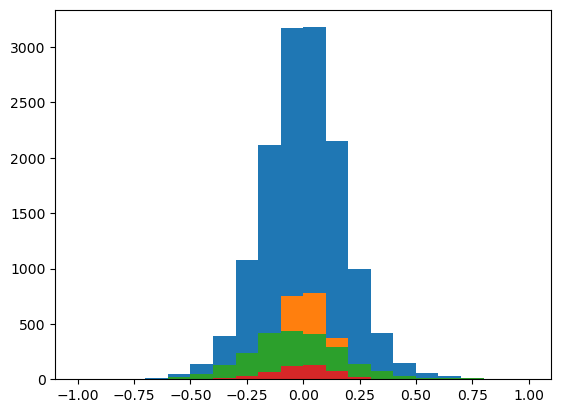

In [22]:
plt.hist(p_pred_test_resids, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_pred_test_resids, bins=np.arange(-1, 1.01, 0.1));
plt.hist(p_pred_holdout_resids, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_pred_holdout_resids, bins=np.arange(-1, 1.01, 0.1));

Text(0.02, 0.5, 'Count')

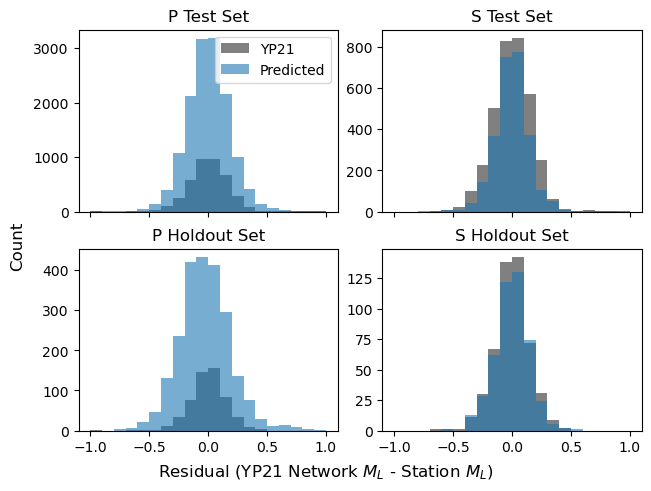

In [23]:
fig, axes = plt.subplots(2, 2, constrained_layout=True)
axes = axes.flatten()

bins = np.arange(-1, 1.1, 0.1)
# P test set
axes[0].set_title("P Test Set")
axes[0].hist(p_test_resids, bins=bins, color='gray', label='YP21');
axes[0].hist(p_pred_test_resids, bins=bins, alpha=0.6, label='Predicted');
axes[0].legend()
axes[0].set_xticklabels([])

# S test set
axes[1].set_title("S Test Set")
axes[1].hist(s_test_resids, bins=bins, color='gray');
axes[1].hist(s_pred_test_resids, bins=bins, alpha=0.6);
axes[1].set_xticklabels([])

# P 2022 set
axes[2].set_title("P Holdout Set")
axes[2].hist(p_2022_resids, bins=bins, color='gray');
axes[2].hist(p_pred_holdout_resids, bins=bins, alpha=0.6);

# S 2022 set
axes[3].set_title("S Holdout Set")
axes[3].hist(s_2022_resids, bins=bins, color='gray');
axes[3].hist(s_pred_holdout_resids, bins=bins, alpha=0.6);

fig.supxlabel("Residual (YP21 Network $M_L$ - Station $M_L$)")
fig.supylabel("Count")

# Limit the station magnitude estimates to those from the same stations because there are many more stations with picks in the predicted catalog

In [24]:
p_test_merge = p_test_ypml.merge(p_test_preds_df, left_on=['Evid', 'Sta'], right_on=['Evid', 'station'], how='inner')
s_test_merge = s_test_ypml.merge(s_test_preds_df, left_on=['Evid', 'Sta'], right_on=['Evid', 'station'], how='inner')
p_2022_merge = p_2022_ypml.merge(p_holdout_preds_df, left_on=['Evid', 'Sta'], right_on=['Evid', 'station'], how='inner')
s_2022_merge = s_2022_ypml.merge(s_holdout_preds_df, left_on=['Evid', 'Sta'], right_on=['Evid', 'station'], how='inner')

In [25]:
p_test_merge_resid = p_test_merge['Event-Mean-YPML-S'] - p_test_merge['Station-YPML-S']
s_test_merge_resid = s_test_merge['Event-Mean-YPML-S'] - s_test_merge['Station-YPML-S']
p_2022_merge_resid = p_2022_merge['Event-Mean-YPML-S'] - p_2022_merge['Station-YPML-S']
s_2022_merge_resid = s_2022_merge['Event-Mean-YPML-S'] - s_2022_merge['Station-YPML-S']

In [26]:
p_pred_test_merge_resid = p_test_merge['Event-Mean-YPML-S'] - p_test_merge['predicted_magnitude']
s_pred_test_merge_resid = s_test_merge['Event-Mean-YPML-S'] - s_test_merge['predicted_magnitude']
p_pred_2022_merge_resid = p_2022_merge['Event-Mean-YPML-S'] - p_2022_merge['predicted_magnitude']
s_pred_2022_merge_resid = s_2022_merge['Event-Mean-YPML-S'] - s_2022_merge['predicted_magnitude']

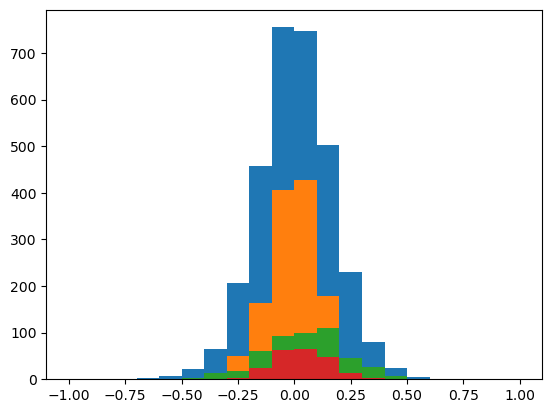

In [27]:
plt.hist(p_pred_test_merge_resid, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_pred_test_merge_resid, bins=np.arange(-1, 1.01, 0.1));
plt.hist(p_pred_2022_merge_resid, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_pred_2022_merge_resid, bins=np.arange(-1, 1.01, 0.1));

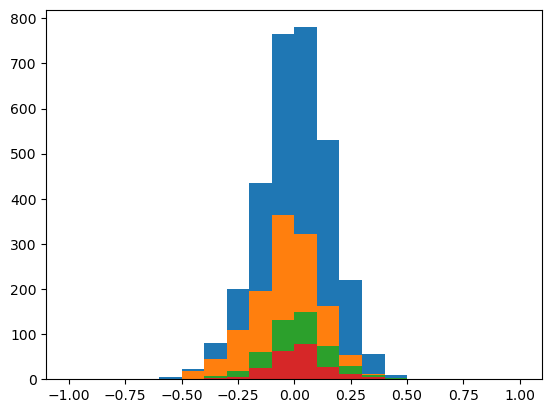

In [28]:
plt.hist(p_test_merge_resid, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_test_merge_resid, bins=np.arange(-1, 1.01, 0.1));
plt.hist(p_2022_merge_resid, bins=np.arange(-1, 1.01, 0.1));
plt.hist(s_2022_merge_resid, bins=np.arange(-1, 1.01, 0.1));

P test

In [29]:
p_test_merge_resid.describe()[['50%', 'std']]

50%    0.004952
std    0.154871
dtype: float64

In [30]:
p_pred_test_merge_resid.describe()[['50%', 'std']]

50%    0.005387
std    0.163517
dtype: float64

S test

In [31]:
s_test_merge_resid.describe()[['50%', 'std']]

50%   -0.025588
std    0.148539
dtype: float64

In [32]:
s_pred_test_merge_resid.describe()[['50%', 'std']]

50%    0.002889
std    0.116761
dtype: float64

P 2022

In [33]:
p_2022_merge_resid.describe()[['50%', 'std']]

50%    0.019814
std    0.143724
dtype: float64

In [34]:
p_pred_2022_merge_resid.describe()[['50%', 'std']]

50%    0.046655
std    0.203345
dtype: float64

S 2022

In [35]:
s_2022_merge_resid.describe()[['50%', 'std']]

50%    0.024028
std    0.130168
dtype: float64

In [36]:
s_pred_2022_merge_resid.describe()[['50%', 'std']]

50%    0.025102
std    0.119246
dtype: float64

Text(0.02, 0.5, 'Count')

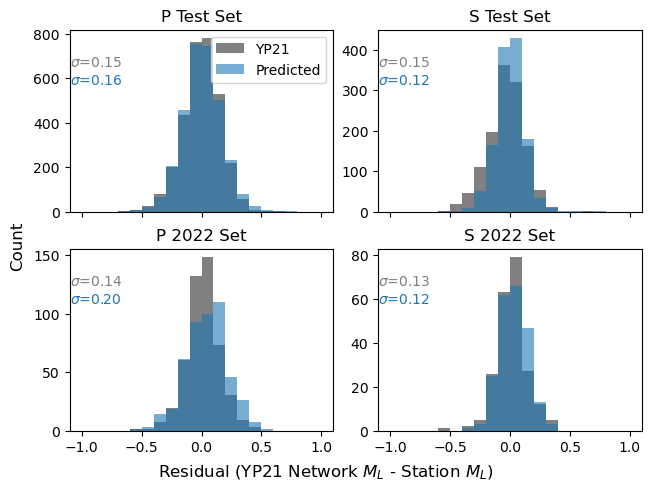

In [54]:
fig, axes = plt.subplots(2, 2, constrained_layout=True)
axes = axes.flatten()

bins = np.arange(-1, 1.1, 0.1)
# P test set
axes[0].set_title("P Test Set")
axes[0].hist(p_test_merge_resid, bins=bins, color='gray', label='YP21');
axes[0].hist(p_pred_test_merge_resid, bins=bins, alpha=0.6, label='Predicted');
axes[0].text(0, 0.8, f"$\sigma$={np.std(p_test_merge_resid):0.2f}", transform=axes[0].transAxes, color='gray')
axes[0].text(0, 0.7, f"$\sigma$={np.std(p_pred_test_merge_resid):0.2f}", transform=axes[0].transAxes, color='C0')
axes[0].legend()
axes[0].set_xticklabels([])

# S test set
axes[1].set_title("S Test Set")
axes[1].hist(s_test_merge_resid, bins=bins, color='gray');
axes[1].hist(s_pred_test_merge_resid, bins=bins, alpha=0.6);
axes[1].text(0, 0.8, f"$\sigma$={np.std(s_test_merge_resid):0.2f}", transform=axes[1].transAxes, color='gray')
axes[1].text(0, 0.7, f"$\sigma$={np.std(s_pred_test_merge_resid):0.2f}", transform=axes[1].transAxes, color='C0')
axes[1].set_xticklabels([])

# P 2022 set
axes[2].set_title("P 2022 Set")
axes[2].hist(p_2022_merge_resid, bins=bins, color='gray');
axes[2].hist(p_pred_2022_merge_resid, bins=bins, alpha=0.6);
axes[2].text(0, 0.8, f"$\sigma$={np.std(p_2022_merge_resid):0.2f}", transform=axes[2].transAxes, color='gray')
axes[2].text(0, 0.7, f"$\sigma$={np.std(p_pred_2022_merge_resid):0.2f}", transform=axes[2].transAxes, color='C0')
# S 2022 set
axes[3].set_title("S 2022 Set")
axes[3].hist(s_2022_merge_resid, bins=bins, color='gray');
axes[3].hist(s_pred_2022_merge_resid, bins=bins, alpha=0.6);
axes[3].text(0, 0.8, f"$\sigma$={np.std(s_2022_merge_resid):0.2f}", transform=axes[3].transAxes, color='gray')
axes[3].text(0, 0.7, f"$\sigma$={np.std(s_pred_2022_merge_resid):0.2f}", transform=axes[3].transAxes, color='C0')
fig.supxlabel("Residual (YP21 Network $M_L$ - Station $M_L$)")
fig.supylabel("Count")

# F-test  
We want to use a lower-tailed test -> The alt. hypothesis is that $\mu < \mu_0$, where $\mu_0$ is the comparator (UUSS/YP21 station magnitude residuals) and $\mu$ is new distribution (ML predicted magnitude residuals)   

Reject the null hypothesis if p < $\alpha$  

F-test is sensitive to normality 

In [38]:
import scipy.stats as st

# This function is from https://stackoverflow.com/a/67885335
def f_test(x, y, alt="two_sided"):
    """
    Calculates the F-test.
    :param x: The first group of data
    :param y: The second group of data
    :param alt: The alternative hypothesis, one of "two_sided" (default), "greater" or "less"
    :return: a tuple with the F statistic value and the p-value.
    """
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    if alt == "greater":
        p = 1.0 - st.f.cdf(f, df1, df2)
    elif alt == "less":
        p = st.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        # Crawley, the R book, p.355
        p = 2.0*(1.0 - st.f.cdf(f, df1, df2))
    return f, p

In [39]:
def hypothesis_result(f_test_result, alpha=0.05):
    p = f_test_result[1]
    if p < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Cannot Reject the Null Hypothesis")

In [40]:
hypothesis_result(f_test(p_test_merge_resid.values, p_pred_test_merge_resid.values, alt='less'))

Reject the Null Hypothesis


In [41]:
hypothesis_result(f_test(s_test_merge_resid.values, s_pred_test_merge_resid.values, alt='less'))

Cannot Reject the Null Hypothesis


In [42]:
hypothesis_result(f_test(p_2022_merge_resid.values, p_pred_2022_merge_resid.values, alt='less'))

Reject the Null Hypothesis


In [43]:
hypothesis_result(f_test(s_2022_merge_resid.values, s_pred_2022_merge_resid.values, alt='less'))

Cannot Reject the Null Hypothesis
